In [81]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [37]:
with xr.open_dataset('data.nc') as ds:
    pass
ds

<xarray.Dataset>
Dimensions:        (time: 17520, station: 49)
Coordinates:
  * time           (time) datetime64[ns] 2022-01-01T00:30:00 ... 2023-12-31T2...
  * station        (station) object 'Alipur_Delhi_DPCC' ... 'Wazirpur_Delhi_D...
    lat            (station) float64 ...
    lon            (station) float64 ...
    elevation      (station) float64 ...
    pop_1km        (station) float64 ...
    pop_2km        (station) float64 ...
    pop_3km        (station) float64 ...
Data variables: (12/25)
    PM2.5          (time, station) float64 ...
    PM10           (time, station) float64 ...
    NO             (time, station) float64 ...
    NO2            (time, station) float64 ...
    NOx            (time, station) float64 ...
    NH3            (time, station) float64 ...
    ...             ...
    RF             (time, station) float64 ...
    TOT-RF         (time, station) float64 ...
    SR             (time, station) float64 ...
    BP             (time, station) float64 ...
    VWS            (time, station) float64 ...
    PM2.5_missing  (time, station) bool ...

In [38]:
(ds["WD"].sel(time=slice("2022", "2023")).isnull().mean(dim="time")>0.99).sum()

<xarray.DataArray 'WD' ()>
array(8)

In [39]:
with xr.open_dataset("~/sarath_auto_download/data/camx120hr_merged_20240123.nc") as mds:
    pass
mds

<xarray.Dataset>
Dimensions:  (TSTEP: 120, LAY: 1, ROW: 80, COL: 80, VAR: 9, DATE-TIME: 2)
Dimensions without coordinates: TSTEP, LAY, ROW, COL, VAR, DATE-TIME
Data variables:
    P10      (TSTEP, LAY, ROW, COL) float32 ...
    P25      (TSTEP, LAY, ROW, COL) float32 ...
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
Attributes: (12/34)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2024022
    CTIME:          90655
    WDATE:          2024022
    ...             ...
    GDNAM:          ????????????????
    UPNAM:          CAMXMETOU       
    VAR-LIST:       P10             P25             
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY:        Tue Jan 23 09:13:58 2024: ncrcat camxout.2024.01.22.nc ca...
    NCO:            netCDF Operators version 4.9.1 (Homepage = http://nco.sf....

In [40]:
mds_lat_min = mds.attrs["YORIG"]
mds_lat_max = mds_lat_min + mds.attrs["YCELL"] * 79
mds_lon_min = mds.attrs["XORIG"]
mds_lon_max = mds_lon_min + mds.attrs["XCELL"] * 79
print(mds_lat_min, mds_lat_max, mds_lon_min, mds_lon_max)

28.200000762939453 28.990000745281577 76.8499984741211 77.63999845646322


In [41]:
((ds.lat > mds_lat_min) & (ds.lat < mds_lat_max) & (ds.lon > mds_lon_min) & (ds.lon < mds_lon_max)).sum()

<xarray.DataArray ()>
array(47)

In [42]:
mds

<xarray.Dataset>
Dimensions:  (TSTEP: 120, LAY: 1, ROW: 80, COL: 80, VAR: 9, DATE-TIME: 2)
Dimensions without coordinates: TSTEP, LAY, ROW, COL, VAR, DATE-TIME
Data variables:
    P10      (TSTEP, LAY, ROW, COL) float32 ...
    P25      (TSTEP, LAY, ROW, COL) float32 ...
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
Attributes: (12/34)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2024022
    CTIME:          90655
    WDATE:          2024022
    ...             ...
    GDNAM:          ????????????????
    UPNAM:          CAMXMETOU       
    VAR-LIST:       P10             P25             
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY:        Tue Jan 23 09:13:58 2024: ncrcat camxout.2024.01.22.nc ca...
    NCO:            netCDF Operators version 4.9.1 (Homepage = http://nco.sf....

In [128]:
metds = xr.open_dataset("~/sarath_auto_download/data/camxmet2d.delhi.20231015.96hours.nc")
metds

<xarray.Dataset>
Dimensions:     (TSTEP: 96, VAR: 14, DATE-TIME: 2, LAY: 1, ROW: 80, COL: 80)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables: (12/15)
    TFLAG       (TSTEP, VAR, DATE-TIME) int32 ...
    TSURF_K     (TSTEP, LAY, ROW, COL) float32 ...
    SNOWEW_M    (TSTEP, LAY, ROW, COL) float32 ...
    SNOWAGE_HR  (TSTEP, LAY, ROW, COL) float32 ...
    PRATE_MMpH  (TSTEP, LAY, ROW, COL) float32 ...
    CLOUD_OD    (TSTEP, LAY, ROW, COL) float32 ...
    ...          ...
    SWSFC_WpM2  (TSTEP, LAY, ROW, COL) float32 ...
    SOLM_M3pM3  (TSTEP, LAY, ROW, COL) float32 ...
    CLDTOP_KM   (TSTEP, LAY, ROW, COL) float32 ...
    CAPE        (TSTEP, LAY, ROW, COL) float32 ...
    PBL_WRF_M   (TSTEP, LAY, ROW, COL) float32 ...
    PBL_YSU_M   (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2023288
    CTIME:          73044
    WDATE:          2023288
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          ????????????????
    UPNAM:          CAMx2IOAPI      
    VAR-LIST:       TSURF_K         SNOWEW_M        SNOWAGE_HR      PRATE_MMp...
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY:

In [129]:
metds["lat"] = ("ROW", np.arange(metds.attrs["YORIG"], metds.attrs["YORIG"] + metds.attrs["YCELL"] * metds.dims["ROW"], metds.attrs["YCELL"]))
metds["lon"] = ("COL", np.arange(metds.attrs["XORIG"], metds.attrs["XORIG"] + metds.attrs["XCELL"] * metds.dims["COL"], metds.attrs["XCELL"]))
dates = metds['TFLAG'][:, 0, 0]
times = metds['TFLAG'][:, 0, 1]
# dates is in YYYYDDD format and times in HHMMSS format. Give me a pandas datetime index
import pandas as pd
dates = pd.to_datetime(dates.astype(str), format='%Y%j')
times = pd.to_timedelta(times//10000, unit='h')
metds['time'] = dates + times
# add time-delta of 5:30 hours to convert UTC to IST
metds['time'] = metds['time'] + pd.Timedelta('5 hours 30 minutes')
metds = metds.set_index(ROW="lat")
metds = metds.set_index(COL="lon")
metds

<xarray.Dataset>
Dimensions:     (TSTEP: 96, VAR: 14, DATE-TIME: 2, LAY: 1, ROW: 80, COL: 80,
                 time: 96)
Coordinates:
  * time        (time) datetime64[ns] 2023-10-15T05:30:00 ... 2023-10-19T04:3...
  * ROW         (ROW) float64 28.2 28.21 28.22 28.23 ... 28.96 28.97 28.98 28.99
  * COL         (COL) float64 76.85 76.86 76.87 76.88 ... 77.62 77.63 77.64
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY
Data variables: (12/15)
    TFLAG       (TSTEP, VAR, DATE-TIME) int32 ...
    TSURF_K     (TSTEP, LAY, ROW, COL) float32 ...
    SNOWEW_M    (TSTEP, LAY, ROW, COL) float32 ...
    SNOWAGE_HR  (TSTEP, LAY, ROW, COL) float32 ...
    PRATE_MMpH  (TSTEP, LAY, ROW, COL) float32 ...
    CLOUD_OD    (TSTEP, LAY, ROW, COL) float32 ...
    ...          ...
    SWSFC_WpM2  (TSTEP, LAY, ROW, COL) float32 ...
    SOLM_M3pM3  (TSTEP, LAY, ROW, COL) float32 ...
    CLDTOP_KM   (TSTEP, LAY, ROW, COL) float32 ...
    CAPE        (TSTEP, LAY, ROW, COL) float32 ...
    PBL_WRF_M   (TSTEP, LAY, ROW, COL) float32 ...
    PBL_YSU_M   (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2023288
    CTIME:          73044
    WDATE:          2023288
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          ????????????????
    UPNAM:          CAMx2IOAPI      
    VAR-LIST:       TSURF_K         SNOWEW_M        SNOWAGE_HR      PRATE_MMp...
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY:

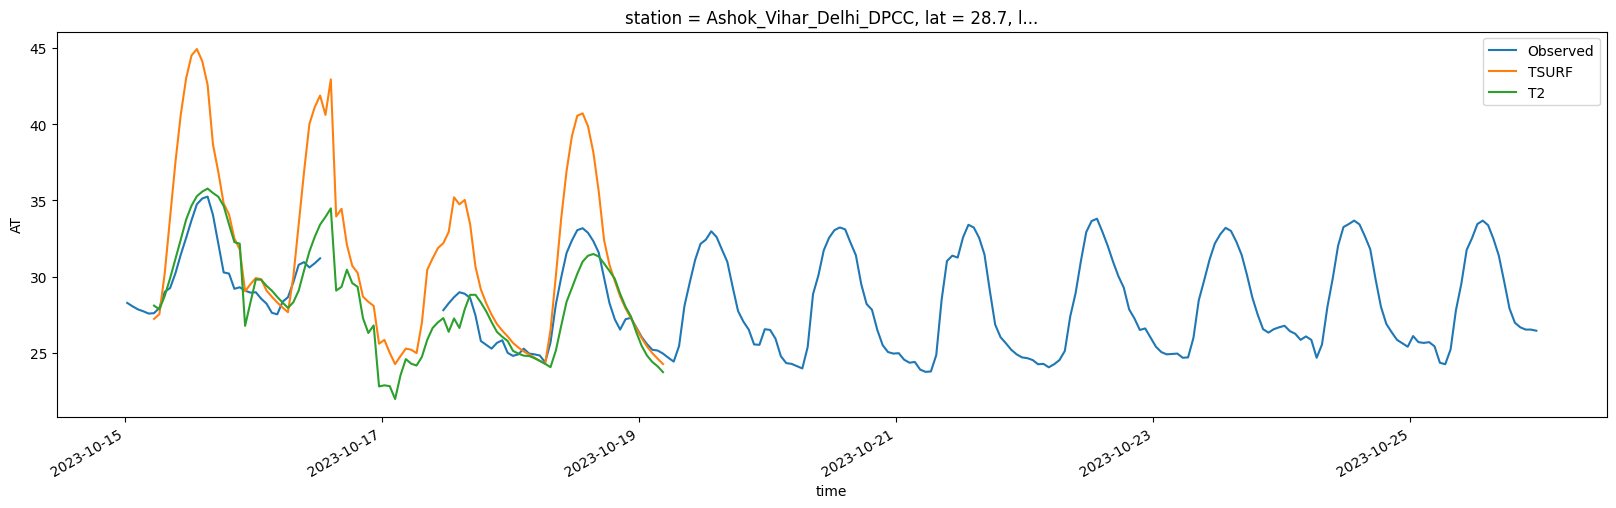

In [133]:
sid = 3
sds = ds.isel(station=sid)

fig, ax = plt.subplots(figsize=(20,5))
sds["AT"].sel(time=slice('2023-10-15', '2023-10-25')).plot(ax=ax, label="Observed")
ax.plot(metds.time, (metds["TSURF_K"]-273.15).sel(ROW=sds.lat.item(), COL=sds.lon.item(), method="nearest"), label="TSURF")
ax.plot(metds.time, (metds["T2_K"]-273.15).sel(ROW=sds.lat.item(), COL=sds.lon.item(), method="nearest"), label="T2")
ax.legend()

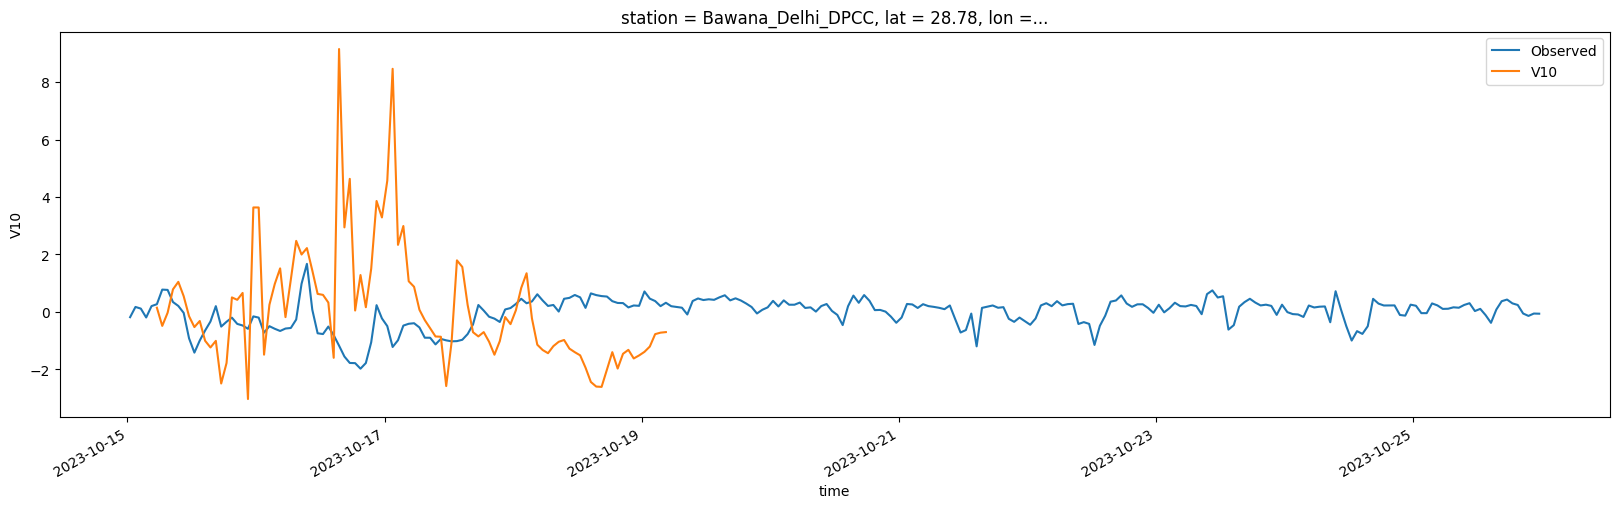

In [142]:
ds["U10"] = ds["WS"] * np.cos(np.deg2rad(ds["WD"]))
ds["V10"] = ds["WS"] * np.sin(np.deg2rad(ds["WD"]))

sid = 5
sds = ds.isel(station=sid)

fig, ax = plt.subplots(figsize=(20,5))
sds["V10"].sel(time=slice('2023-10-15', '2023-10-25')).plot(ax=ax, label="Observed")
ax.plot(metds.time, metds["V10_MpS"].sel(ROW=sds.lat.item(), COL=sds.lon.item(), method="nearest"), label="V10")
# ax.plot(metds.time, (metds["T2_K"]-273.15).sel(ROW=sds.lat.item(), COL=sds.lon.item(), method="nearest"), label="T2")
ax.legend()

In [159]:
from glob import glob
from tqdm.notebook import tqdm

metfiles = glob("/home/patel_zeel/sarath_auto_download/data/camxmet2d*.nc")

for metfile in tqdm(metfiles):
    with xr.open_dataset(metfile) as mds:
        try:
            assert len(mds.TSTEP) == 96, len(mds.TSTEP)
        except AssertionError:
            print(metfile, len(mds.TSTEP))
            print(mds.TFLAG.values[0, 0, :])
            continue

# ds = xr.open_dataset("~/sarath_auto_download/data/camxmet2d.delhi.20231015.96hours.nc")
# ds

  0%|          | 0/215 [00:00<?, ?it/s]

/home/patel_zeel/sarath_auto_download/data/camxmet2d.delhi.20231228.96hours.nc 97
[2023362       0]
/home/patel_zeel/sarath_auto_download/data/camxmet2d.delhi.20231229.96hours.nc 97
[2023363       0]
/home/patel_zeel/sarath_auto_download/data/camxmet2d.delhi.20231231.96hours.nc 97
[2023365       0]
/home/patel_zeel/sarath_auto_download/data/camxmet2d.delhi.20231230.96hours.nc 97
[2023364       0]


In [179]:
import pandas as pd

ds = xr.open_dataset("/home/patel_zeel/sarath_auto_download/data/camxmet2d.delhi.20231228.96hours.nc").isel(TSTEP=slice(0, 24))
ds['ROW'] = ("ROW", np.arange(ds.attrs["YORIG"], ds.attrs["YORIG"] + ds.attrs["YCELL"] * ds.dims["ROW"], ds.attrs["YCELL"]))
ds['COL'] = ("COL", np.arange(ds.attrs["XORIG"], ds.attrs["XORIG"] + ds.attrs["XCELL"] * ds.dims["COL"], ds.attrs["XCELL"]))
dates = ds['TFLAG'][:, 0, 0]
times = ds['TFLAG'][:, 0, 1]
# dates is in YYYYDDD format and times in HHMMSS format. Give me a pandas datetime index
dates = pd.to_datetime(dates.astype(str), format='%Y%j')
times = pd.to_timedelta(times//10000, unit='h')
ds['TSTEP'] = ("TSTEP", dates + times)
# squeeze the ROW and COL dimensions
ds = ds.squeeze("LAY")
# drop the TFLAG variable
ds = ds.drop_vars("TFLAG")
# rename "ROW" and "COL" to "lat" and "lon"
# rename "TSTEP" to "time"
ds = ds.rename({"ROW": "lat", "COL": "lon", "TSTEP": "time"})
ds

<xarray.Dataset>
Dimensions:     (time: 24, lat: 80, lon: 80)
Coordinates:
  * lat         (lat) float64 28.2 28.21 28.22 28.23 ... 28.96 28.97 28.98 28.99
  * lon         (lon) float64 76.85 76.86 76.87 76.88 ... 77.62 77.63 77.64
  * time        (time) datetime64[ns] 2023-12-28 ... 2023-12-28T23:00:00
Data variables: (12/14)
    TSURF_K     (time, lat, lon) float32 ...
    SNOWEW_M    (time, lat, lon) float32 ...
    SNOWAGE_HR  (time, lat, lon) float32 ...
    PRATE_MMpH  (time, lat, lon) float32 ...
    CLOUD_OD    (time, lat, lon) float32 ...
    U10_MpS     (time, lat, lon) float32 ...
    ...          ...
    SWSFC_WpM2  (time, lat, lon) float32 ...
    SOLM_M3pM3  (time, lat, lon) float32 ...
    CLDTOP_KM   (time, lat, lon) float32 ...
    CAPE        (time, lat, lon) float32 ...
    PBL_WRF_M   (time, lat, lon) float32 ...
    PBL_YSU_M   (time, lat, lon) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2023362
    CTIME:          82229
    WDATE:          2023362
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          ????????????????
    UPNAM:          CAMx2IOAPI      
    VAR-LIST:       TSURF_K         SNOWEW_M        SNOWAGE_HR      PRATE_MMp...
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY: